<a href="https://colab.research.google.com/github/s4ki3f/yolo/blob/main/yolov8_cattle_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jan 29 09:38:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml    epochs=1 ...
            ...           ...           ...
          segment        predict        yolov8n-seg.pt
          classify        val           yolov8n-cls.pt
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 6.23M/6.23M [00:00<00:00, 284MB/s]
Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 21.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.6ms
Speed: 0.6ms pre-process, 15.6ms inference, 17.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


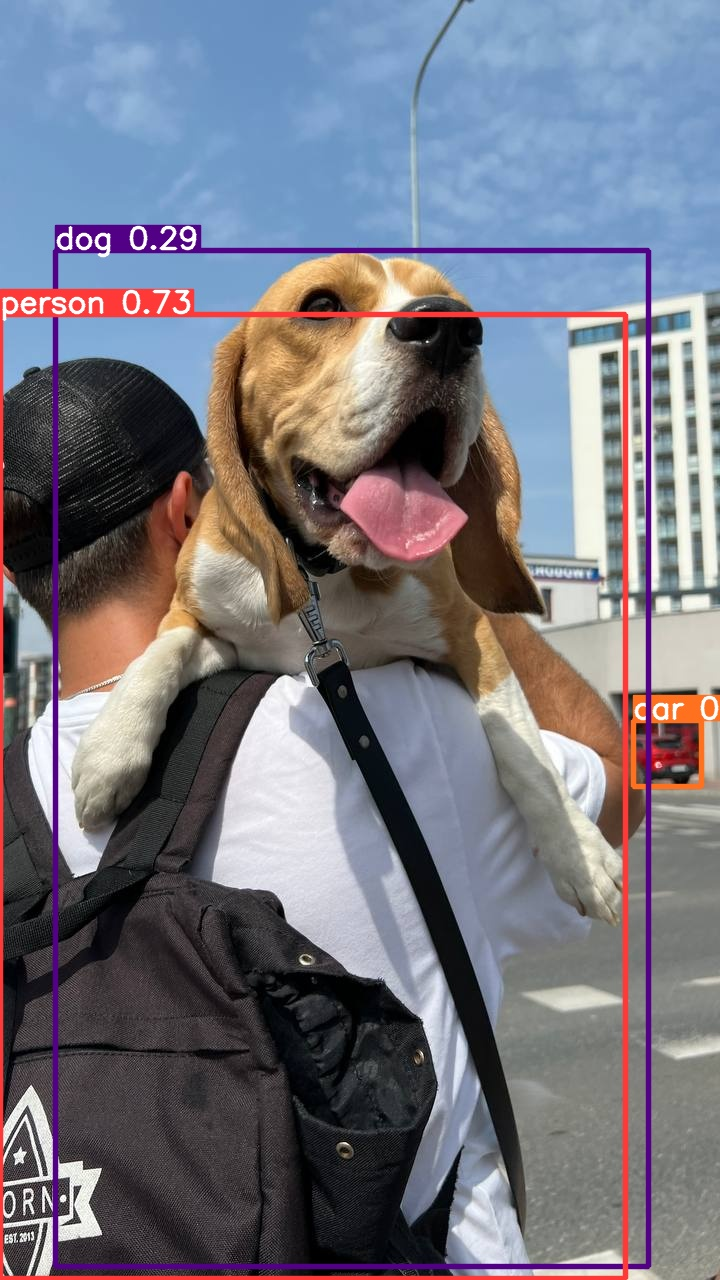

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.1ms
Speed: 0.6ms pre-process, 15.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Oo0A8COVnDGnqBgc9GBP")
project = rf.workspace("thauqief-sadiq-7afee").project("cow-breeds")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=62231d61bb6b15da313fde195da50646ca051e701aafa60c5f1427c69b569885
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.23, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Cow-Breeds-1 in yolov8:: 100%|██████████| 4848/4848 [00:02<00:00, 2068.44it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
 #from ultralytics import YOLO
    
    # Load a model
   # model = YOLO("yolov8n-cls.yaml")  # build a new model from scratch
   # model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)
    
    # Train the model
   # results = model.train(data="", epochs=100, imgsz=64)

# Load YOLOv8n-cls, train it on imagenette160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/Cow-Identification-1', epochs=3)  # train the model
model('/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg')  # predict on an image

  0%|          | 0.00/5.28M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/Cow-Identification-1, epochs=3, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0

## Custom Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Cow-Breeds-1/data.yaml epochs=100 imgsz=800 plots=True batch=32

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Cow-Breeds-1/data.yaml, epochs=100, patience=50, batch=32, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

/content


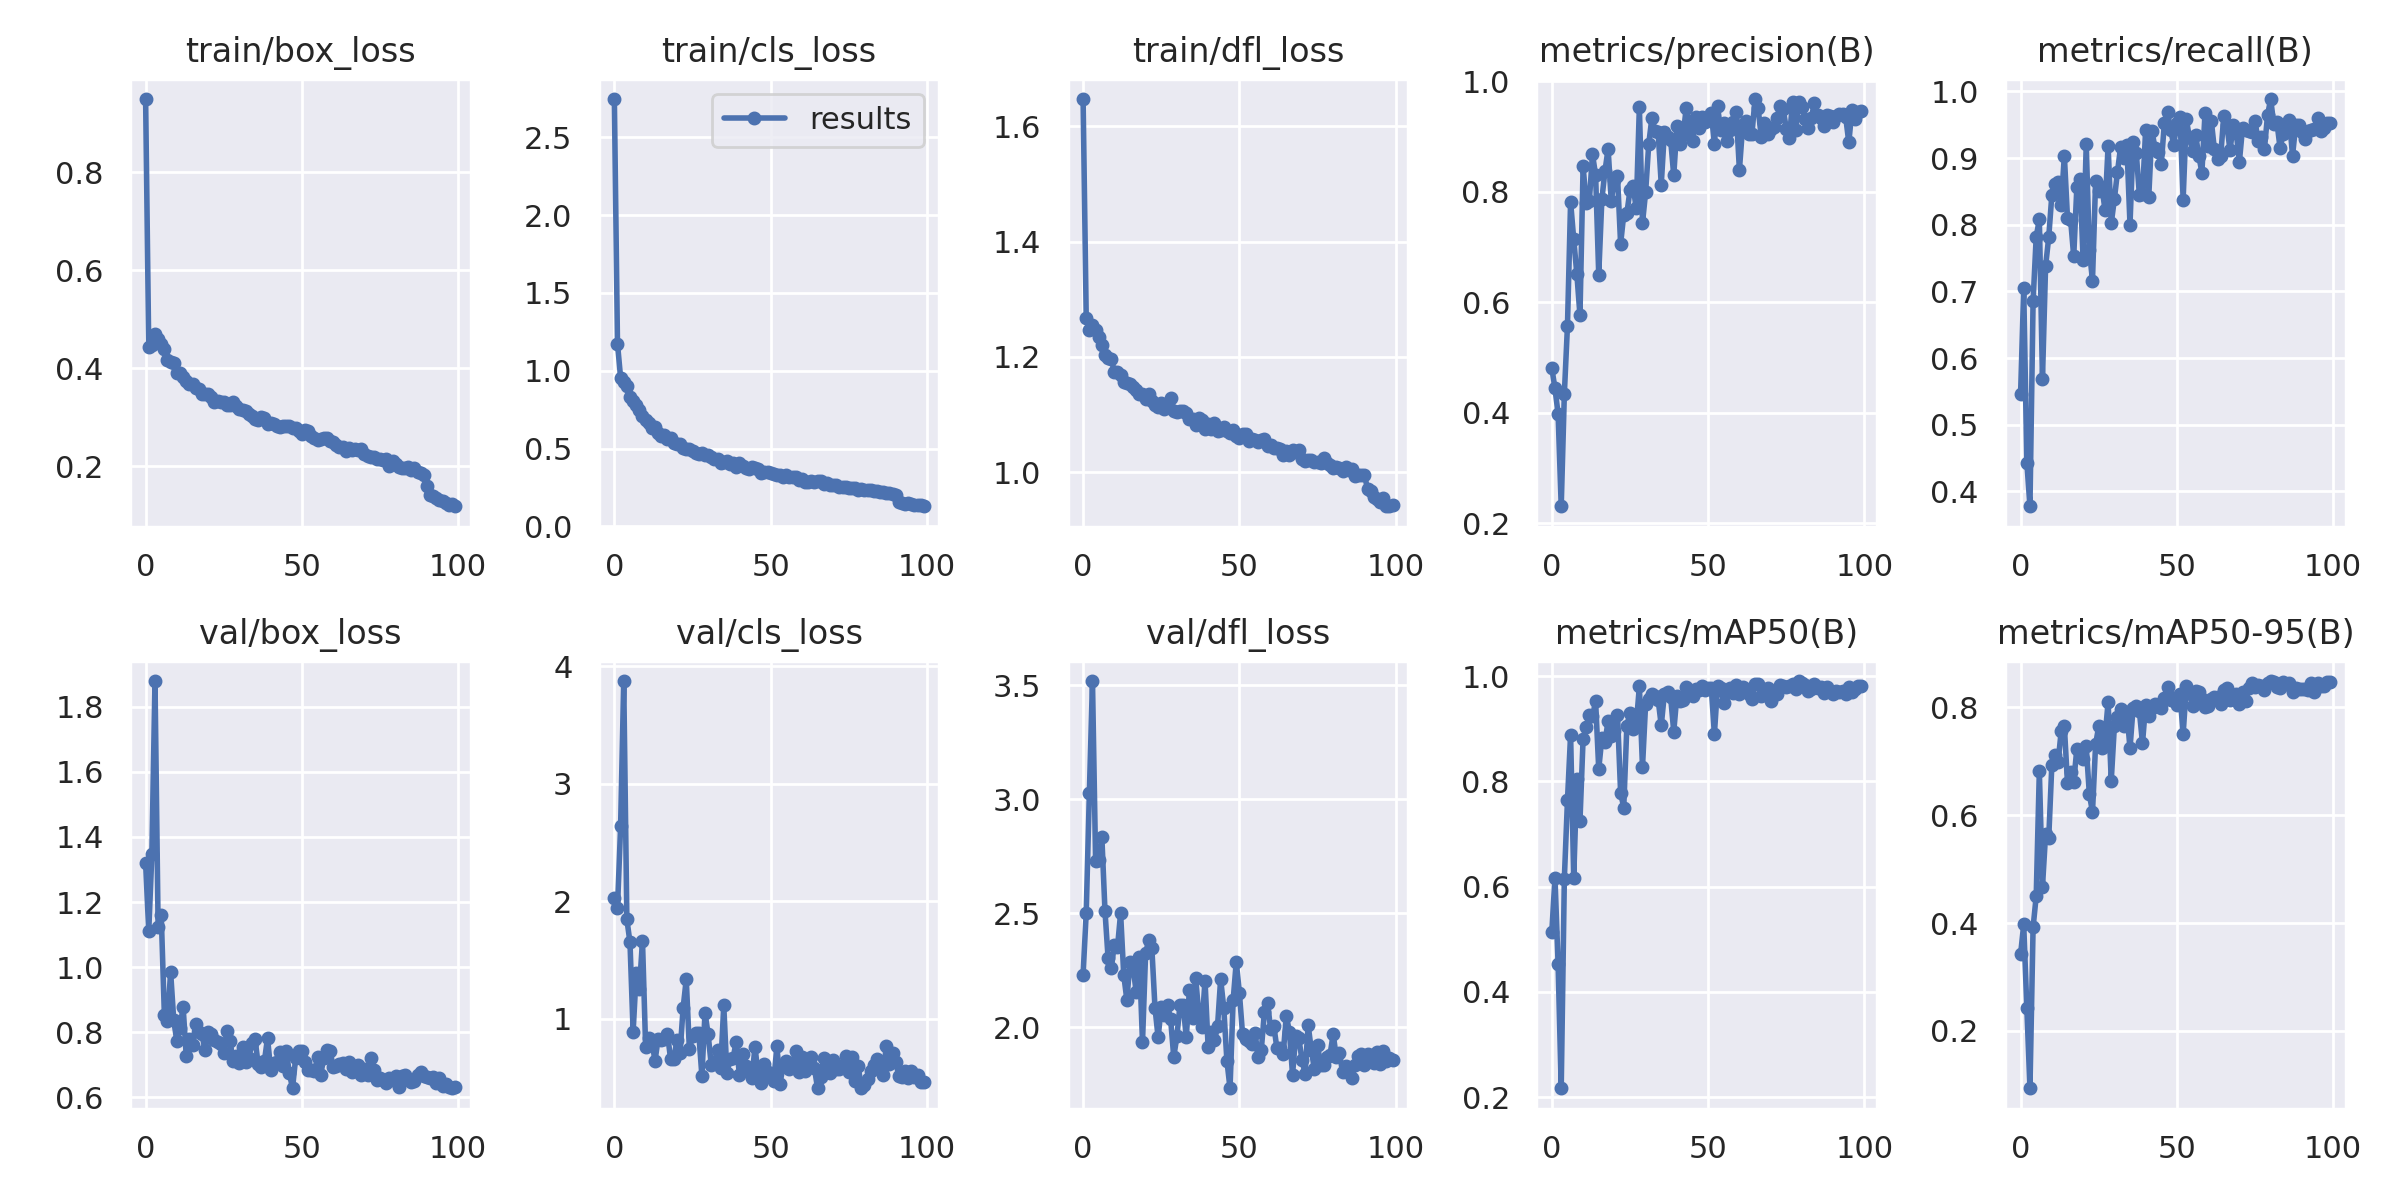

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle50_jpg.rf.2a3df514338ae430a380f44a4d6c0aaa.jpg: 800x800 1 Holstein Friesian, 26.1ms
image 2/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle51_c_jpg.rf.2352ebe9b74d270482493f019bc05a1f.jpg: 800x800 1 Holstein Friesian, 26.1ms
image 3/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle55_c_jpg.rf.dfb3e32dbbceac0dc9d6e18cb6fba981.jpg: 800x800 1 Holstein Friesian, 26.1ms
image 4/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle58_c_jpg.rf.2451319fda8c8571dd1aea1ed3adccb1.jpg: 800x800 1 Holstein Friesian, 26.1ms
image 5/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle61_c_jpg.rf.56c4a5684b6c382b63ea7a56dad02408.jpg: 800x800 1 Holstein Friesian, 26.1ms
image 6/95 /content/Cow-Breeds-1/test/images/HolsteinFriesia

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/Cow-Breeds-1/data.yaml epochs=3 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Cow-Breeds-1/data.yaml, epochs=3, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

/content


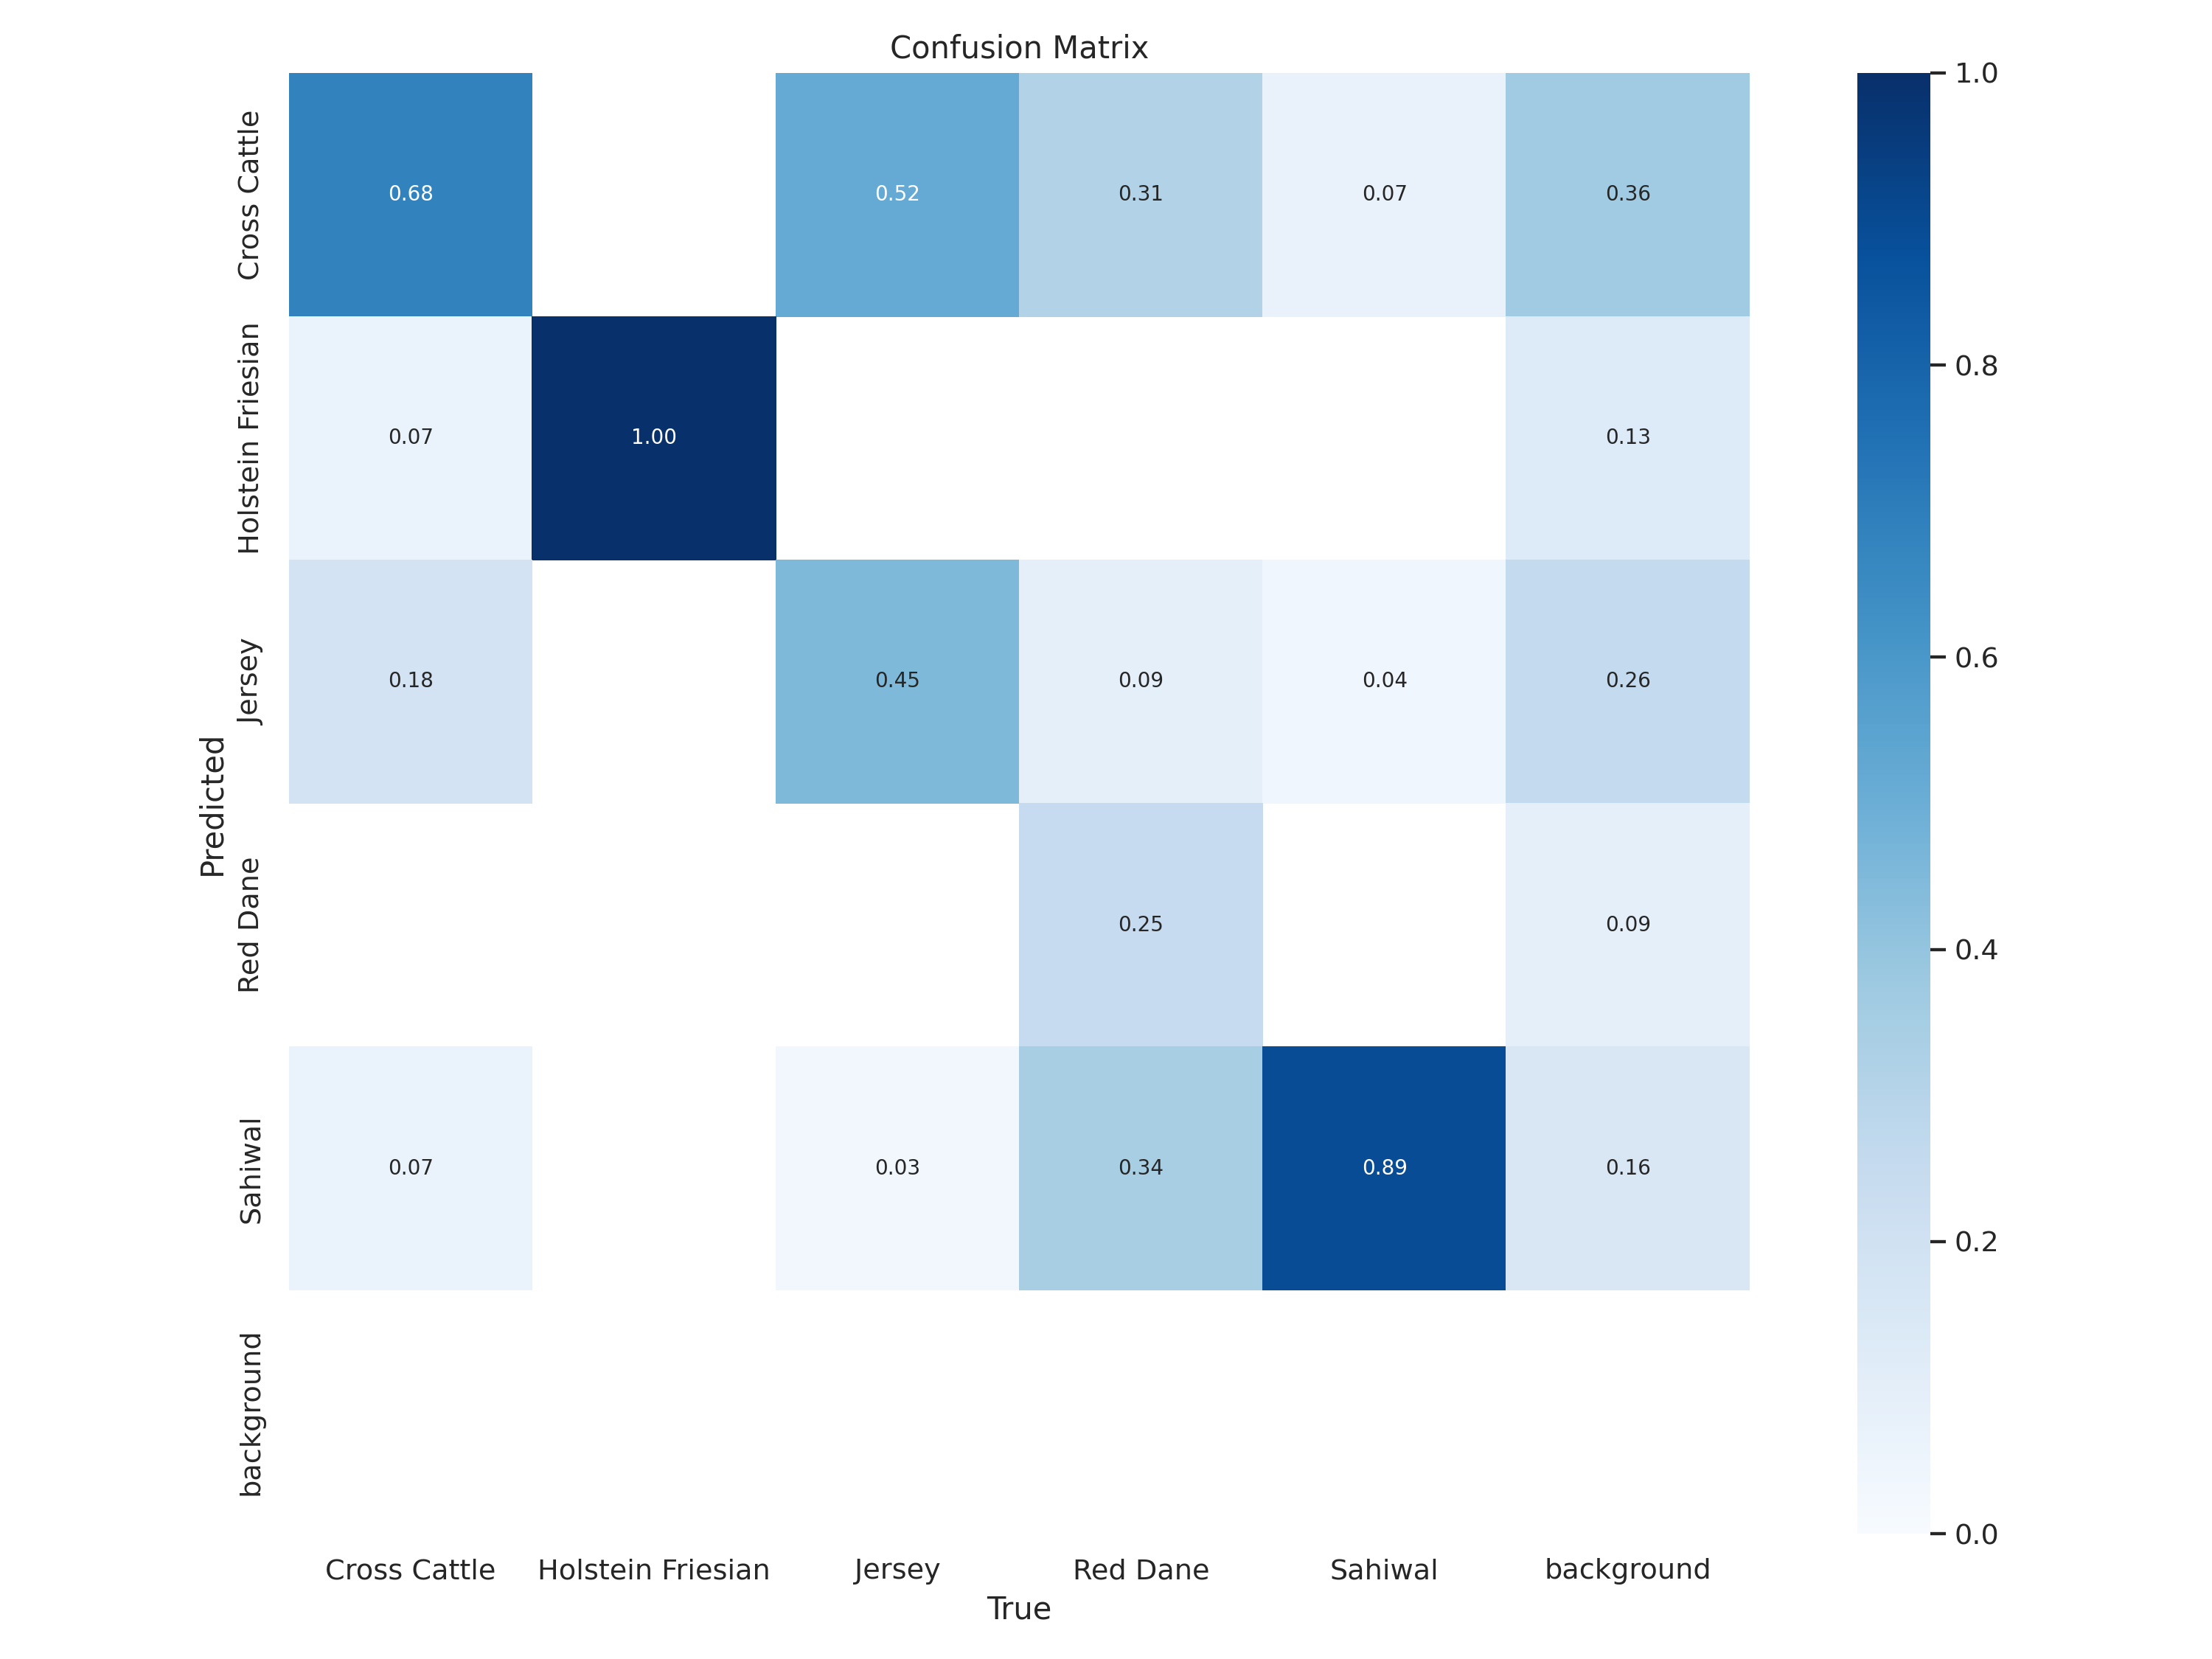

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


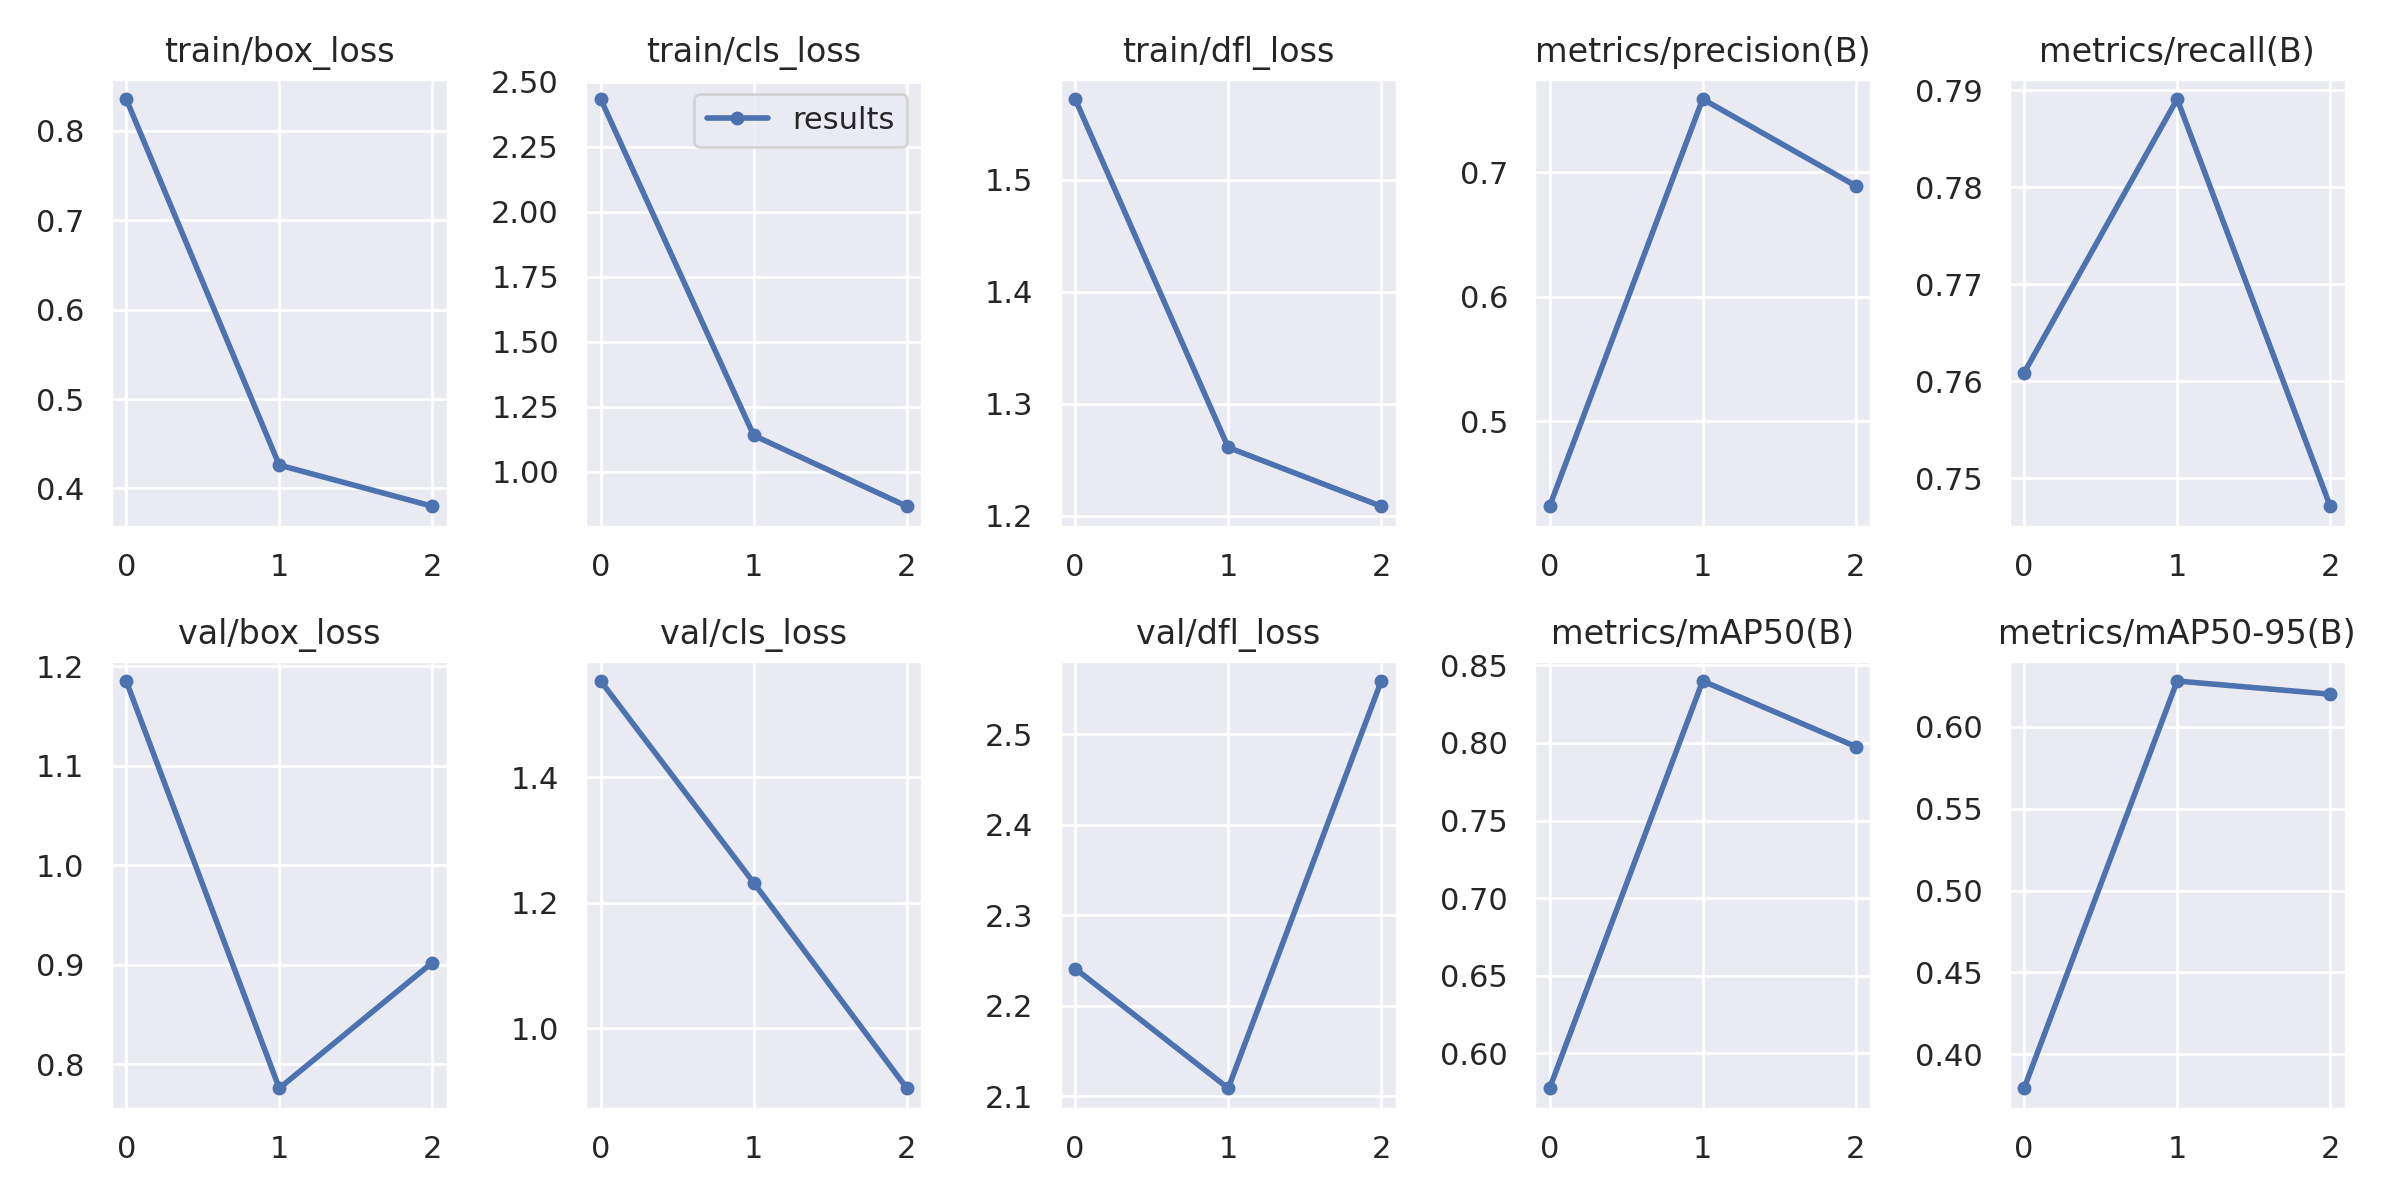

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


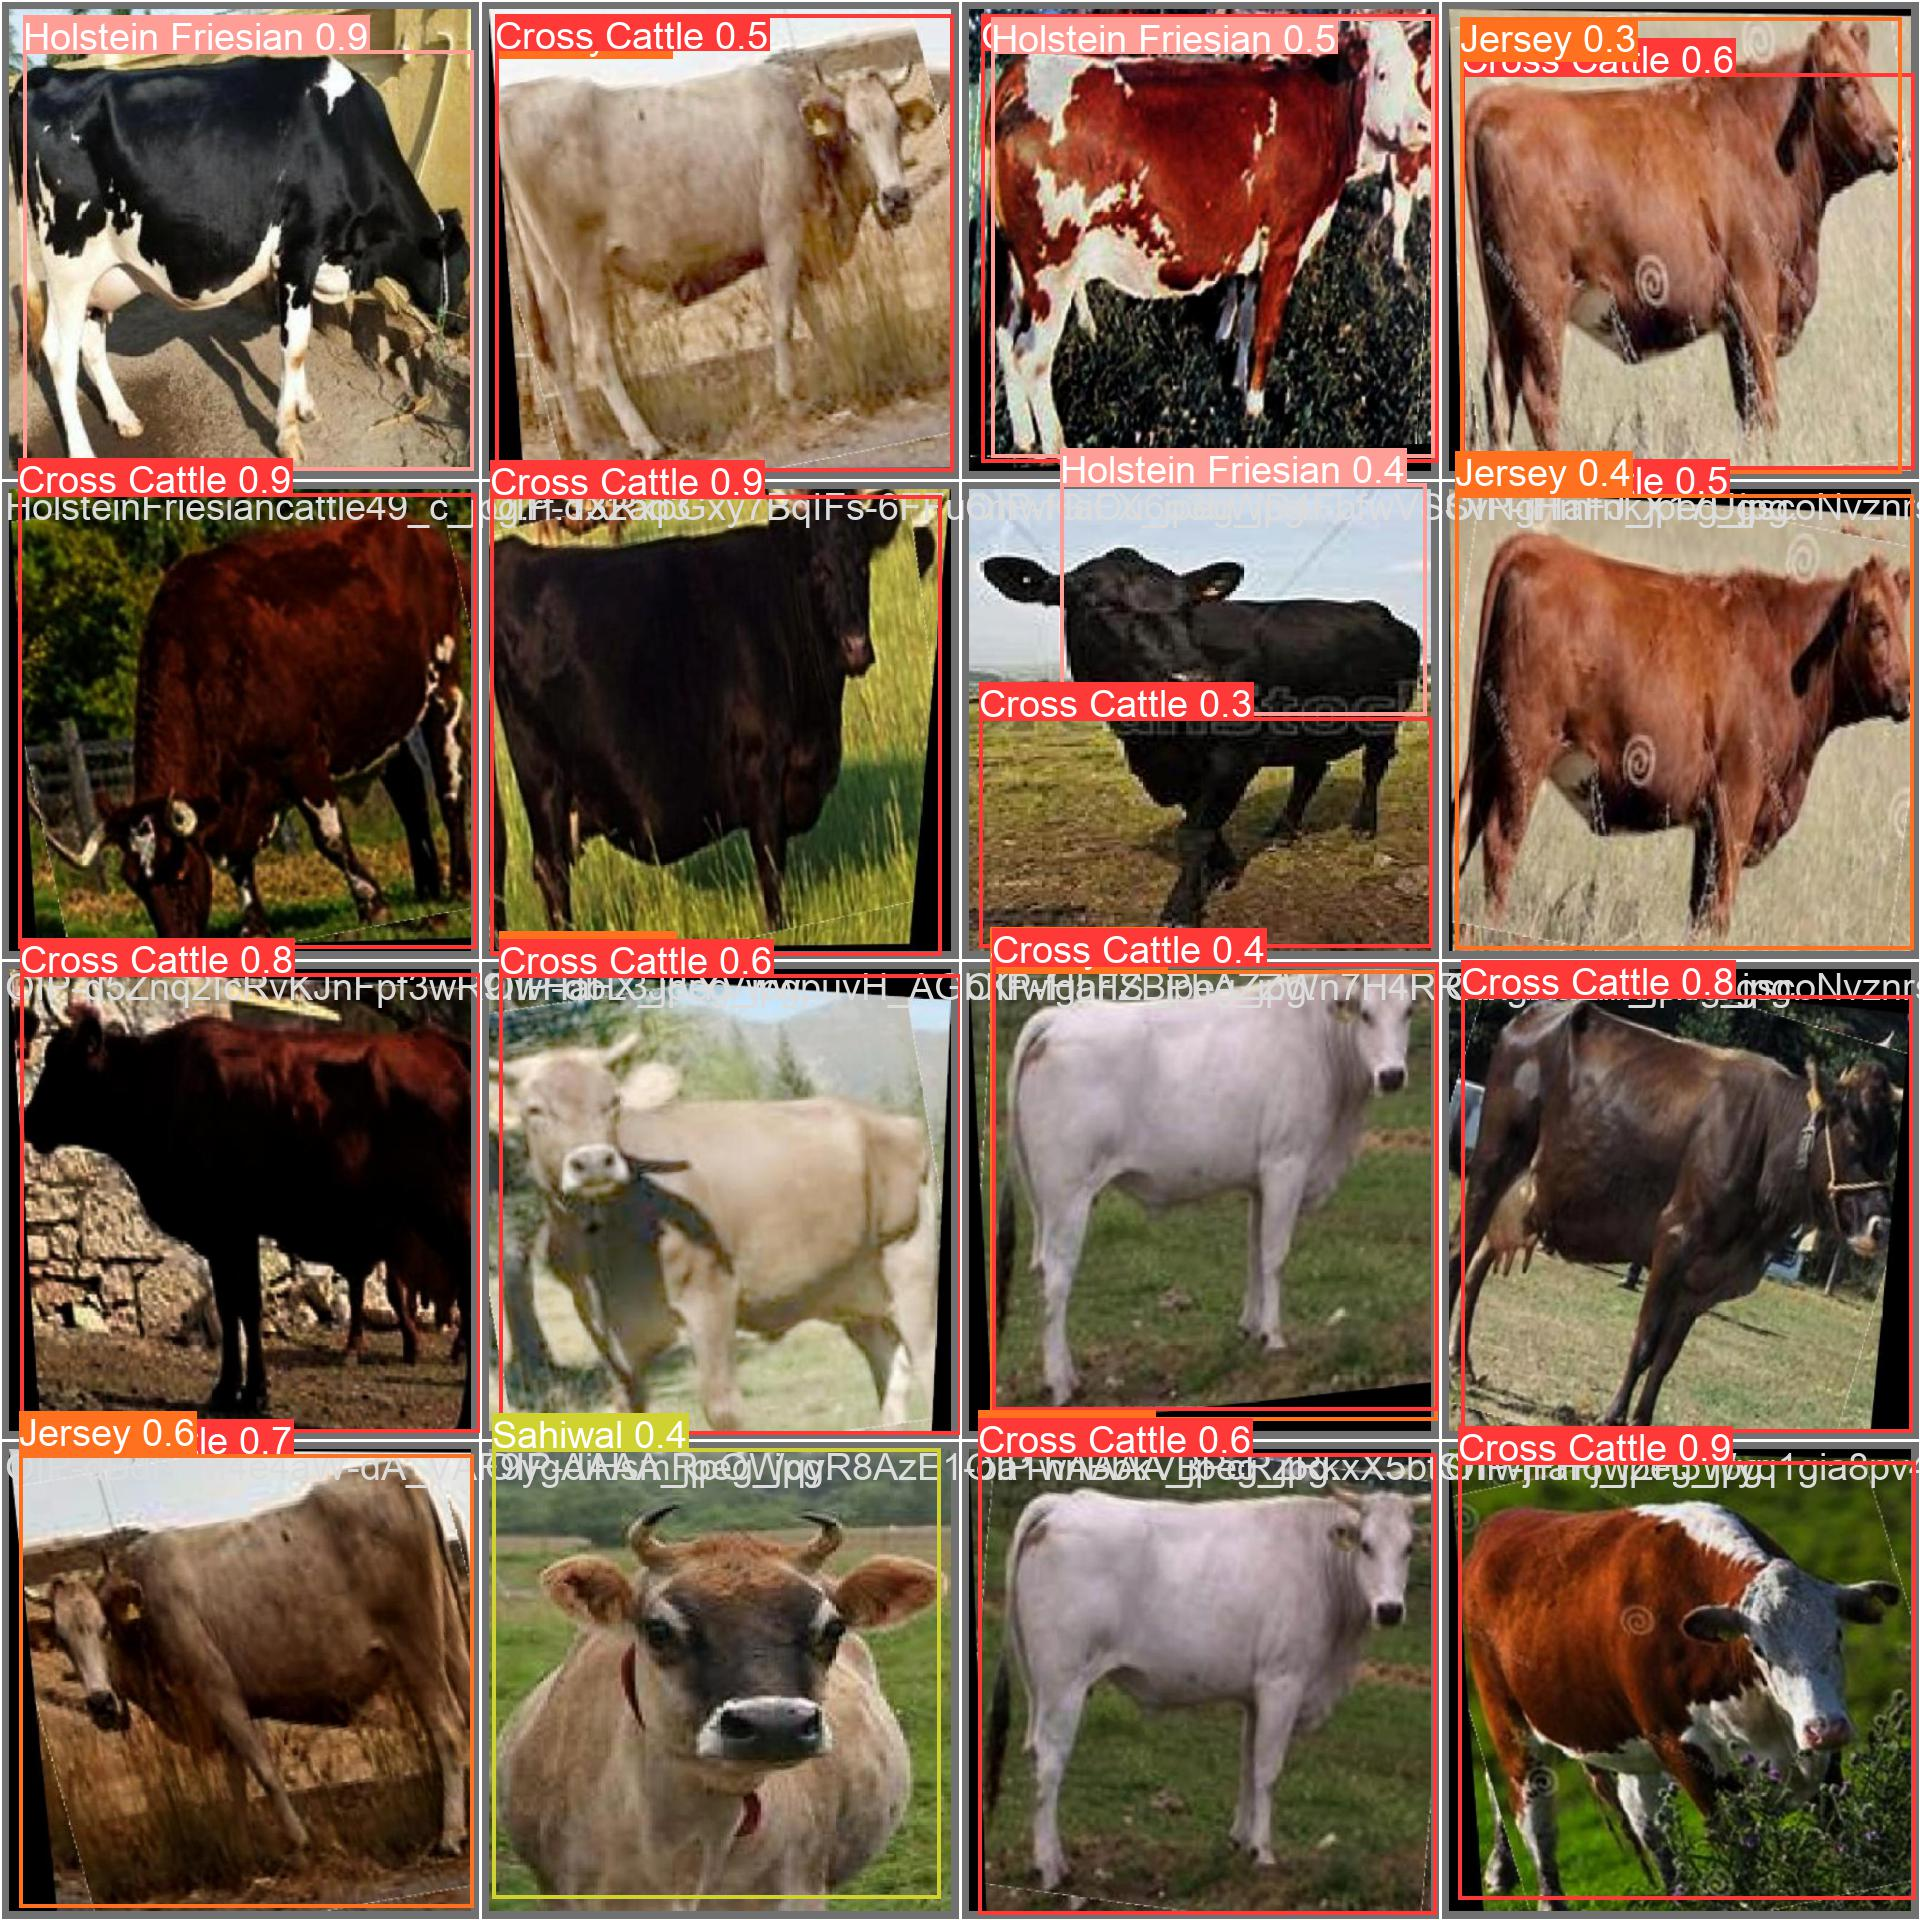

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle50_jpg.rf.2a3df514338ae430a380f44a4d6c0aaa.jpg: 800x800 1 Holstein Friesian, 26.4ms
image 2/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle51_c_jpg.rf.2352ebe9b74d270482493f019bc05a1f.jpg: 800x800 5 Holstein Friesians, 26.2ms
image 3/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle55_c_jpg.rf.dfb3e32dbbceac0dc9d6e18cb6fba981.jpg: 800x800 5 Holstein Friesians, 26.2ms
image 4/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle58_c_jpg.rf.2451319fda8c8571dd1aea1ed3adccb1.jpg: 800x800 1 Holstein Friesian, 26.2ms
image 5/95 /content/Cow-Breeds-1/test/images/HolsteinFriesiancattle61_c_jpg.rf.56c4a5684b6c382b63ea7a56dad02408.jpg: 800x800 1 Holstein Friesian, 26.2ms
image 6/95 /content/Cow-Breeds-1/test/images/HolsteinFries

In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data='/content/Cow-Identification-1' epochs=300


/content
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Cow-Identification-1, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=Fa

In [ ]:
!yolo task=classify mode=val model=/content/runs/classify/train2/weights/best.pt data='/content/Cow-Identification-1'


Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=640, width=640, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100% 16/16 [00:04<00:00,  3.62it/s]
                   all    0.00398     0.0199
Speed: 0.5ms pre-process, 2.2ms inference, 0.0ms loss, 0.0ms post-process per image


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg'


Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_2700/cattle_2700_DSCF1273_jpg.rf.18e7015665545779572565fd6002ce77.jpg: 224x224 cattle_2700 0.94, cattle_4680 0.03, cattle_5971 0.01, cattle_6066 0.01, cattle_4678 0.00, 5.5ms
Speed: 0.3ms pre-process, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_1700/cattle_1700_DSCF7433_jpg.rf.55ecc41d8aaadc717595cb75d1433ac4.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_1700/cattle_1700_DSCF7433_jpg.rf.55ecc41d8aaadc717595cb75d1433ac4.jpg: 224x224 cattle_5171 0.67, cattle_1700 0.31, cattle_5234 0.01, cattle_5633 0.00, cattle_4985 0.00, 5.4ms
Speed: 0.3ms pre-process, 5.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_9798/cattle_9798_DSCF8571_jpg.rf.5d75e5355d7395ee99a4710818fe351e.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_9798/cattle_9798_DSCF8571_jpg.rf.5d75e5355d7395ee99a4710818fe351e.jpg: 224x224 cattle_9798 0.98, cattle_5090 0.01, cattle_5165 0.00, cattle_6237 0.00, cattle_4951 0.00, 5.6ms
Speed: 0.3ms pre-process, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.75 source='/content/Cow-Identification-1/test/cattle_9798/cattle_9798_DSCF8571_jpg.rf.5d75e5355d7395ee99a4710818fe351e.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_9798/cattle_9798_DSCF8571_jpg.rf.5d75e5355d7395ee99a4710818fe351e.jpg: 224x224 cattle_9798 0.98, cattle_5090 0.01, cattle_5165 0.00, cattle_6237 0.00, cattle_4951 0.00, 5.4ms
Speed: 0.3ms pre-process, 5.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict4


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/train/cattle_1700/cattle_1700_DSCF7431_jpg.rf.f5c633319b2342c52b88d079a4c0a586.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/train/cattle_1700/cattle_1700_DSCF7431_jpg.rf.f5c633319b2342c52b88d079a4c0a586.jpg: 224x224 cattle_5171 0.46, cattle_1700 0.41, cattle_5815 0.06, cattle_1500 0.01, cattle_5170 0.01, 5.4ms
Speed: 0.3ms pre-process, 5.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict5


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train2/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/valid/cattle_1700/cattle_1700_DSCF7434_jpg.rf.9fc8dc4d863cf2cf8b752110e6bb19c6.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/valid/cattle_1700/cattle_1700_DSCF7434_jpg.rf.9fc8dc4d863cf2cf8b752110e6bb19c6.jpg: 224x224 cattle_1700 0.70, cattle_5171 0.28, cattle_5234 0.01, cattle_5633 0.00, cattle_1500 0.00, 5.6ms
Speed: 0.3ms pre-process, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict6


In [ ]:
!yolo task=classify mode=train model=/content/runs/classify/train2/weights/last.pt data='/content/Cow-Identification-1' epochs=50

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=classify, mode=train, model=/content/runs/classify/train2/weights/last.pt, data=/content/Cow-Identification-1, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17

In [ ]:
!yolo task=classify mode=val model=/content/runs/classify/train3/weights/best.pt data='/content/Cow-Identification-1'


Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=640, width=640, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100% 16/16 [00:04<00:00,  3.66it/s]
                   all    0.00398     0.0239
Speed: 0.4ms pre-process, 2.3ms inference, 0.0ms loss, 0.0ms post-process per image


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train3/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/train/cattle_1700/cattle_1700_DSCF7431_jpg.rf.f5c633319b2342c52b88d079a4c0a586.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/train/cattle_1700/cattle_1700_DSCF7431_jpg.rf.f5c633319b2342c52b88d079a4c0a586.jpg: 224x224 cattle_5164 0.19, cattle_1700 0.10, cattle_3847 0.08, cattle_5761 0.08, cattle_5171 0.04, 5.5ms
Speed: 0.3ms pre-process, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict7


In [ ]:
!yolo task=classify mode=predict model='/content/runs/classify/train3/weights/best.pt' conf=0.25 source='/content/Cow-Identification-1/test/cattle_1700/cattle_1700_DSCF7433_jpg.rf.55ecc41d8aaadc717595cb75d1433ac4.jpg'

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
YOLOv8n-cls summary: 73 layers, 1775626 parameters, 0 gradients, 3.6 GFLOPs
image 1/1 /content/Cow-Identification-1/test/cattle_1700/cattle_1700_DSCF7433_jpg.rf.55ecc41d8aaadc717595cb75d1433ac4.jpg: 224x224 cattle_5171 0.19, cattle_1700 0.12, cattle_3847 0.06, cattle_4820 0.05, cattle_5633 0.05, 5.9ms
Speed: 0.3ms pre-process, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict9


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1673360155.b8486c1adb66.2291.0  train_batch585.jpg
F1_curve.png					    train_batch586.jpg
P_curve.png					    train_batch587.jpg
PR_curve.png					    val_batch0_labels.jpg
predictions.json				    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    weights
train_batch0.jpg


/content


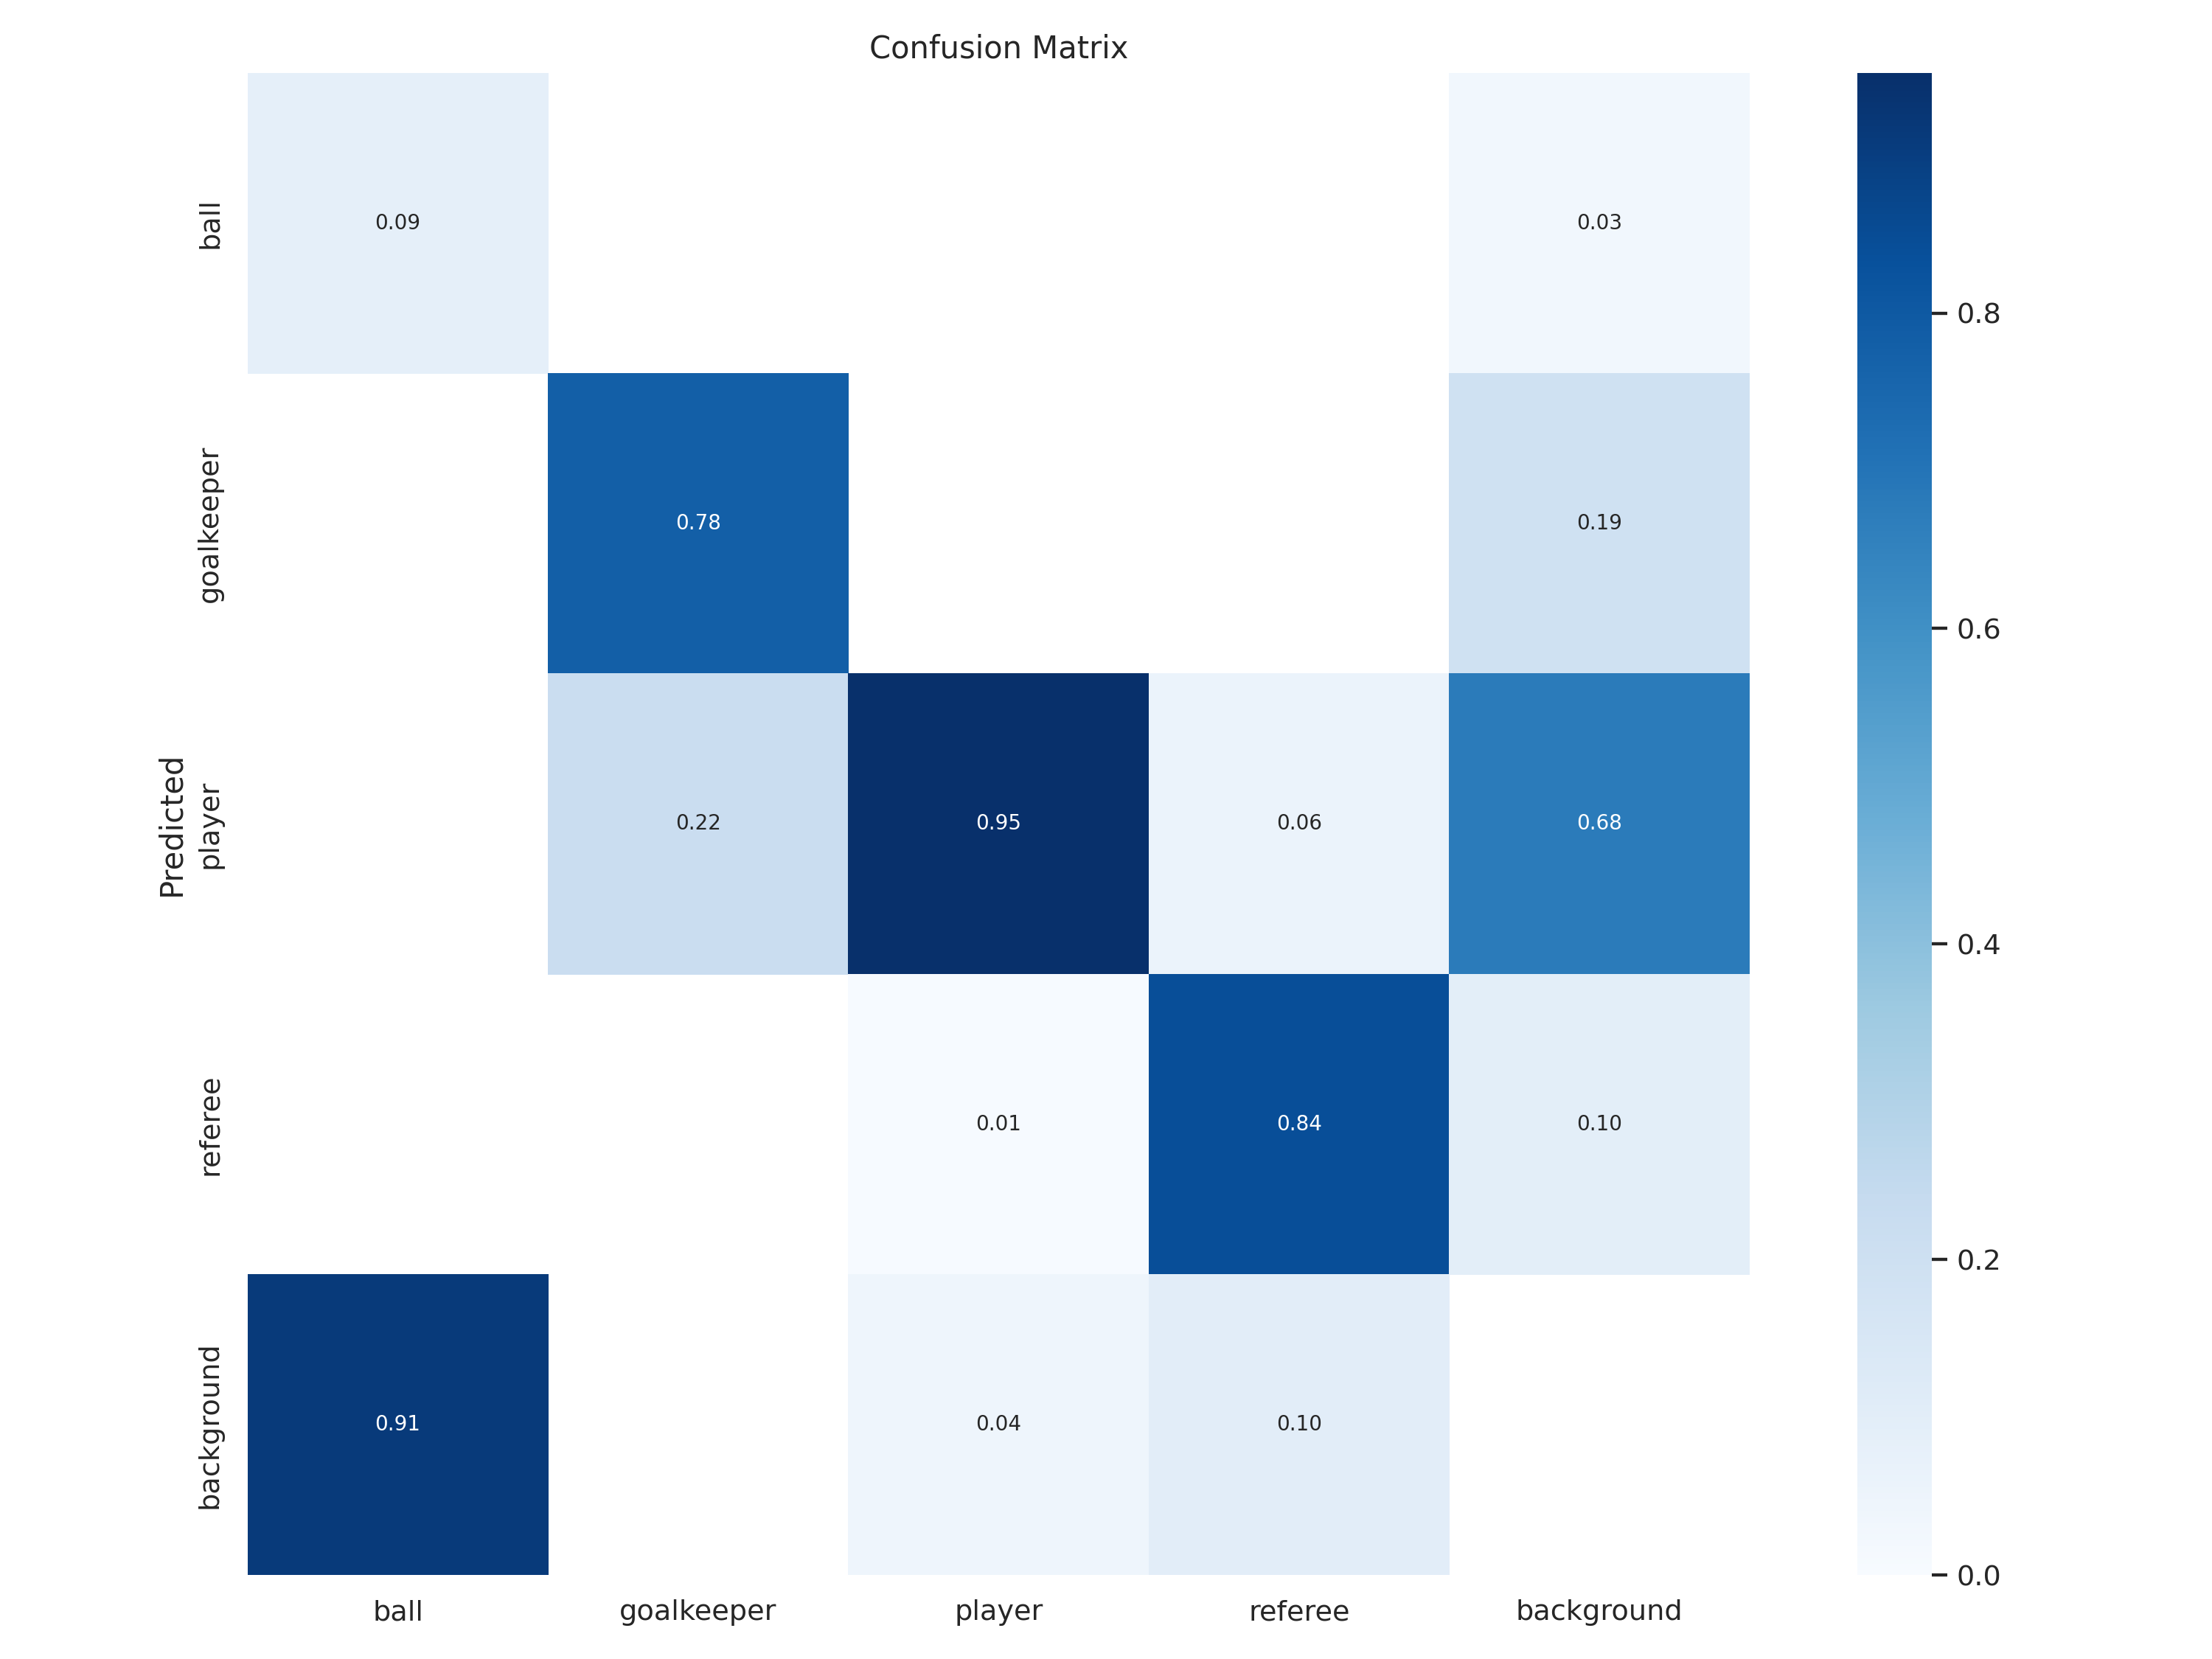

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


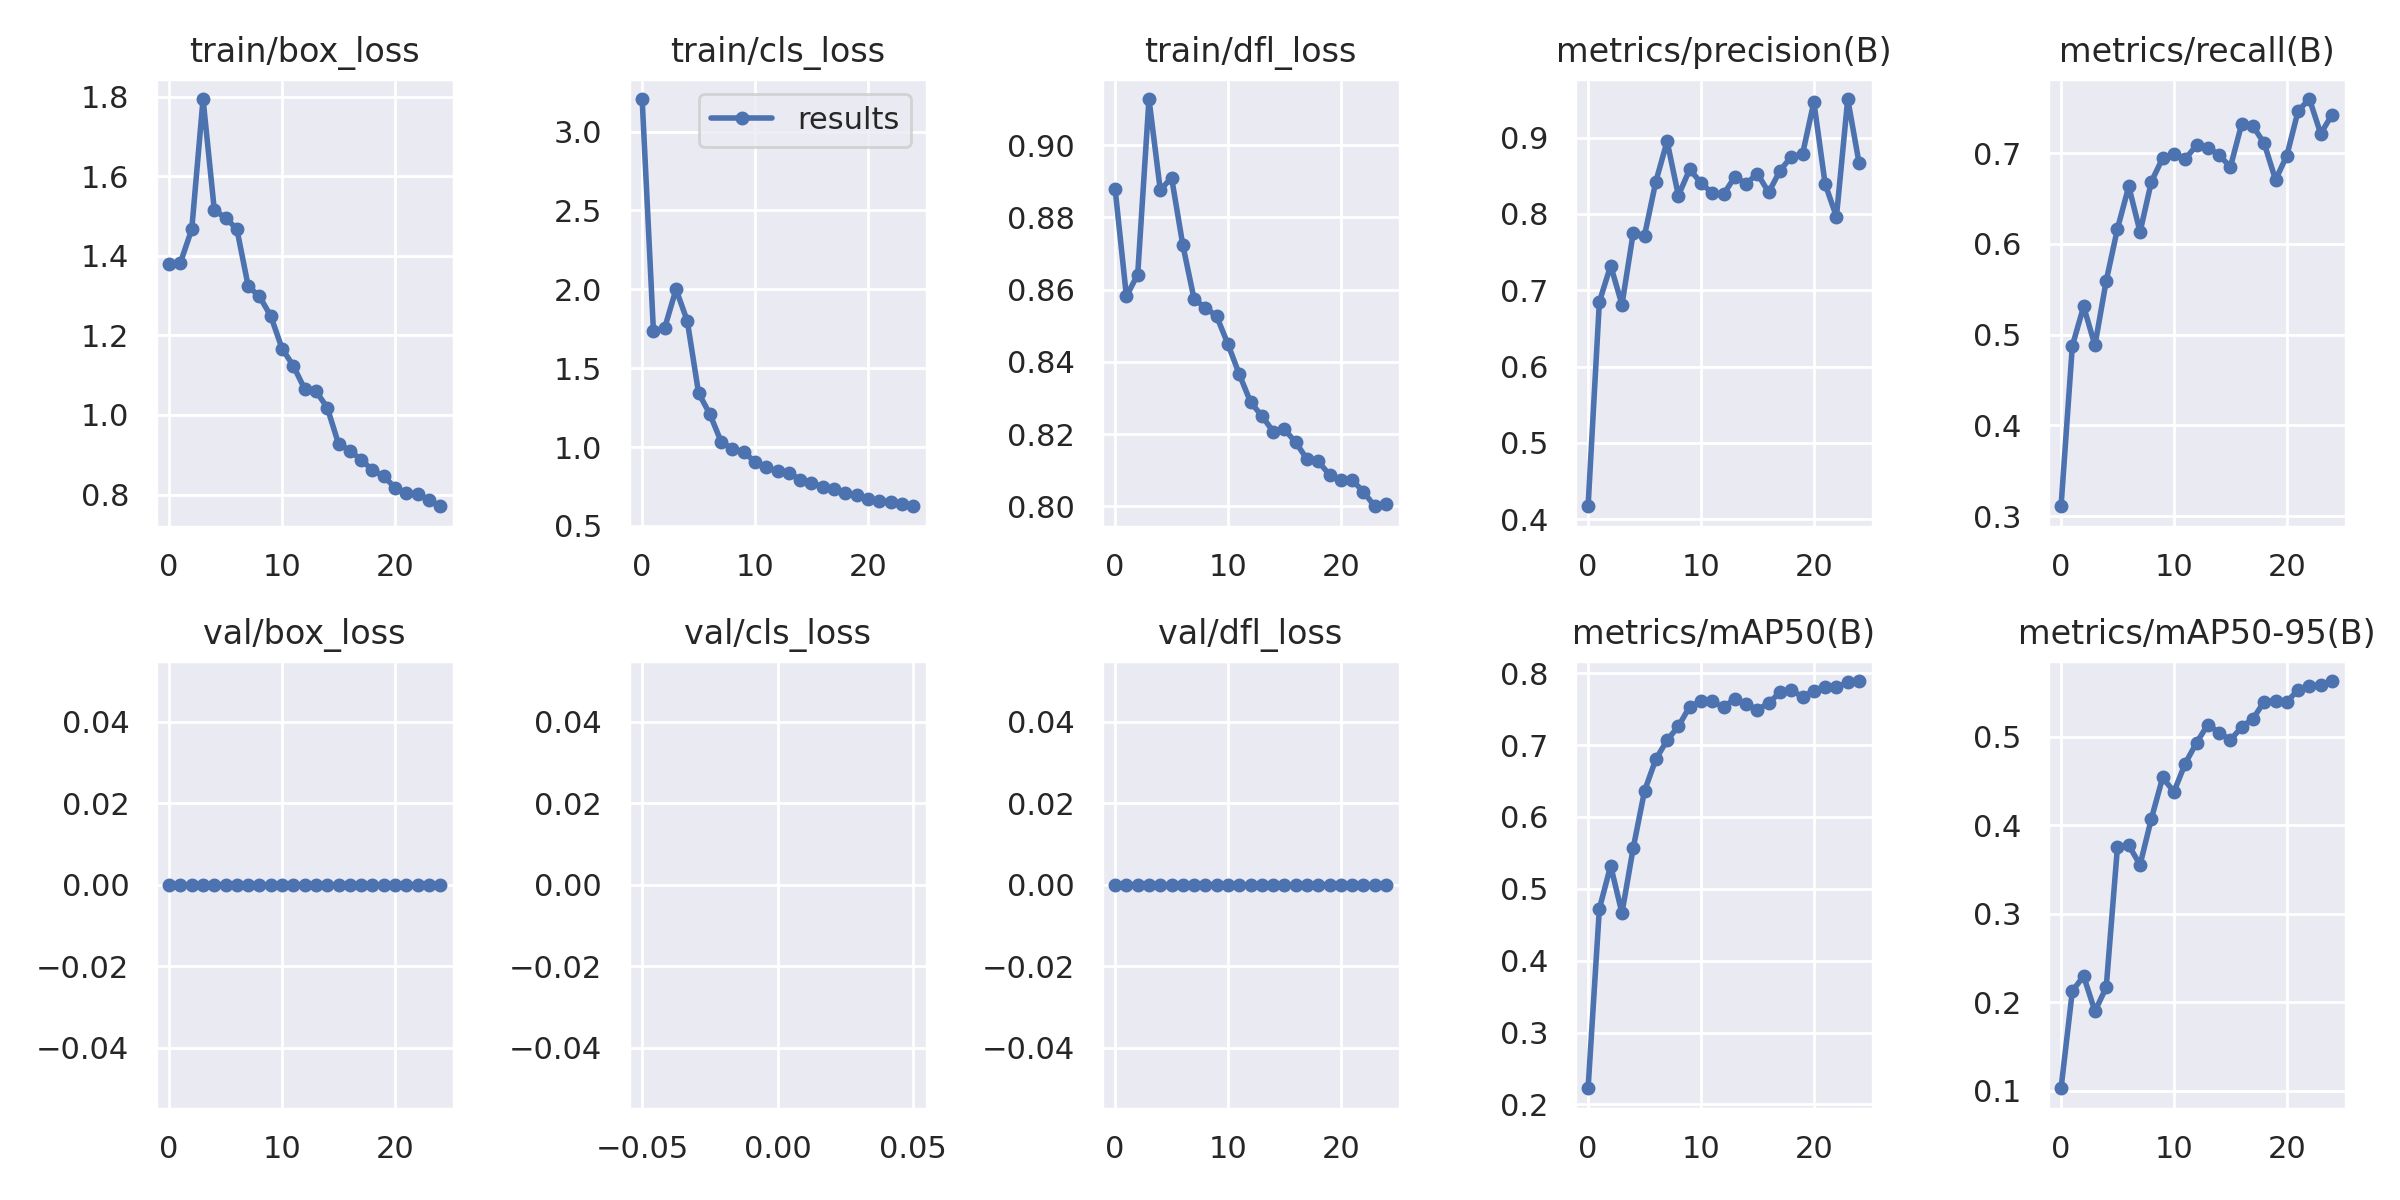

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


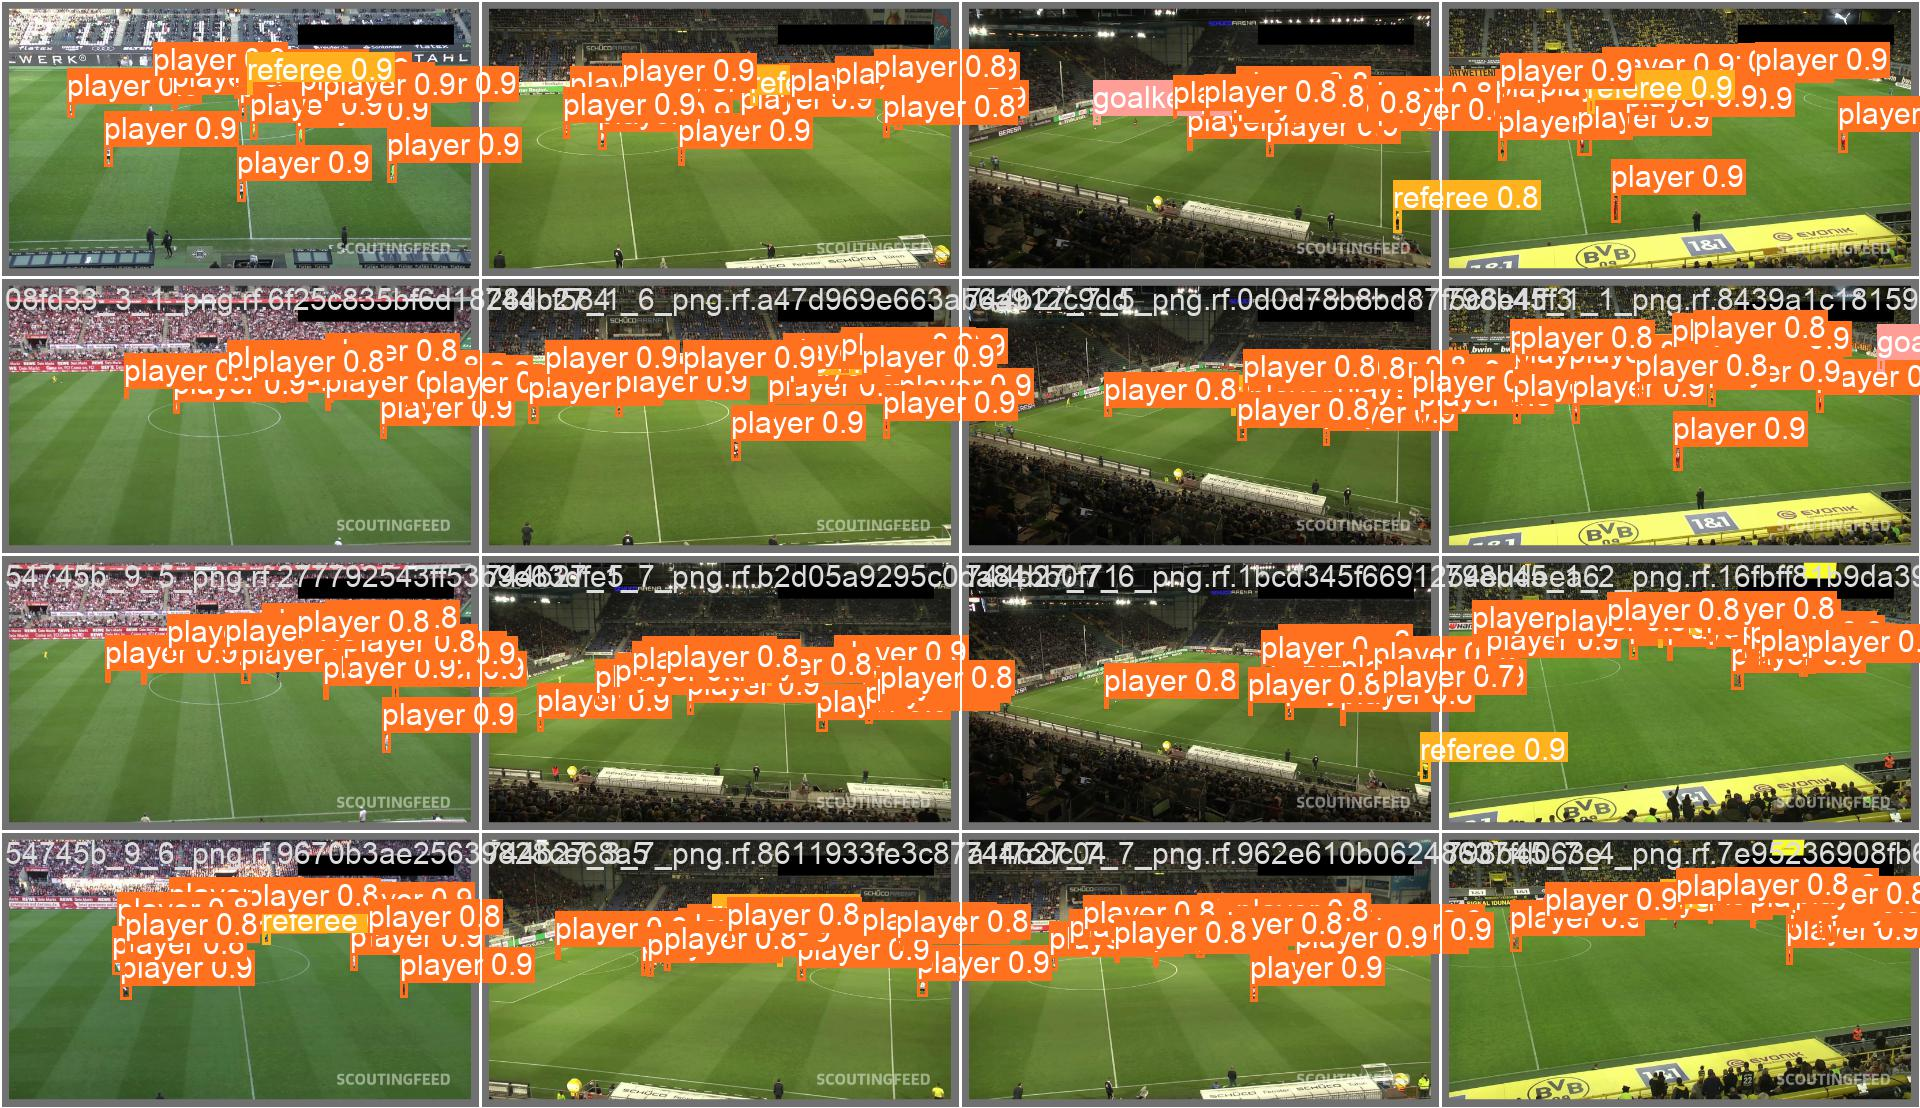

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.2 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.58s/it]
                   all         38        905      0.869      0.709      0.777       0.51
                  ball         38         35      0.957      0.229       0.33     0.0689
            goalkeeper         38         27      0.753      0.902      0.953      0.701
                player         38        754      0.956       0.93      0.975      0.742
               referee         38         89      0.812      0.775      0.851      0.528
Speed: 3.7ms pre-process, 9.5ms inference, 0.0ms loss, 3.1ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.2 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 1 referee, 15.5ms
image 2/13 /content/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 23 players, 1 referee, 11.6ms
image 3/13 /content/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.6ms
image 4/13 /content/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 3 referees, 11.6ms
image 5/13 /content/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: 384x640 1 goalkeeper, 20 players, 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.